In [1]:
# OID = 2226832103641712942
# OID = 1053090246851297631
# OID = 2226880482153333268
# OID = 2226928860664971934
# OID = 2226792521223122099
# OID = 2528742163131035981
OID = 2226748540758019375

In [2]:
%pip install lsdb

DEPRECATION: lsst-analysis-ap g7299995a7b+825fa8b952 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-analysis-ap or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: lsst-display-astrowidgets g07dc498a13+fb7087bc2f has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-display-astrowidgets or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: lsst-drp-pipe g3017752cde+f3a893b7ce has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of lsst-drp-pipe or contact the author to suggest th

In [3]:
from pathlib import Path

release = "w_2025_04"
hats_path = Path("/sdf/data/rubin/shared/lsdb_commissioning/DASH/") / release / "hats"
# list dir
print(list(map(str, hats_path.iterdir())))

comcam_obj = hats_path / "object"
comcam_src = hats_path / "forcedSource"

['/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaSource', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/source', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaForcedSource', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/object', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/diaObject', '/sdf/data/rubin/shared/lsdb_commissioning/DASH/w_2025_04/hats/forcedSource']


In [4]:
# Load the Forced Source + MJD Table
from lsdb import read_hats

filters = [("objectId", "==", OID)]

obj = read_hats(
    comcam_obj,
    columns=["objectId", "coord_ra", "coord_dec"],
    filters=filters,
)
src_flat = read_hats(
    comcam_src,
    # columns=[
    #     "objectId", 
    #     "coord_ra", "coord_dec",
    #     "band",
    #     "midpointMJDTai",
    #     "psfFlux", "psfFluxErr", "psfFlux_flag",
    #     "forcedSourceId",
    #     "detector",
    #     "visit",
    # ],
    filters=filters,
)
src_nested = obj.join_nested(
    src_flat,
    nested_column_name="lc",
    left_on="objectId",
    right_on="objectId",
)
src_nested

/sdf/data/rubin/user/kostya/linccf/.venv/lib/python3.11/site-packages/lsdb/dask/join_catalog_data.py:332: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,objectId,coord_ra,coord_dec,lc
npartitions=161,,,,
"Order: 5, Pixel: 32",int64[pyarrow],double[pyarrow],double[pyarrow],"nested<forcedSourceId: [int64], parentObjectId..."
"Order: 7, Pixel: 544",...,...,...,...
...,...,...,...,...
"Order: 6, Pixel: 35970",...,...,...,...
"Order: 6, Pixel: 35971",...,...,...,...


In [12]:
import pandas as pd; pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None)

ndf = src_nested.compute()
display(ndf)
data = ndf.iloc[0]
display(data)
data.lc.sort_values("midpointMJDTai")

,objectId,coord_ra,coord_dec,lc
_healpix_29,,,,
2528736289489219776,2226748540758019375,53.133445,-28.235972,forcedSourceId parentObjectId coor...


objectId                                   2226748540758019375
coord_ra                                             53.133445
coord_dec                                           -28.235972
lc                    forcedSourceId  parentObjectId   coor...
Name: 2528736289489219776, dtype: object

,forcedSourceId,parentObjectId,coord_ra,coord_dec,visit,detector,band,psfFlux,psfFluxErr,psfFlux_flag,psfDiffFlux,psfDiffFluxErr,psfDiffFlux_flag,localPhotoCalib,localPhotoCalib_flag,localPhotoCalibErr,localWcs_flag,localWcs_CDMatrix_2_1,localWcs_CDMatrix_1_1,localWcs_CDMatrix_1_2,localWcs_CDMatrix_2_2,localBackground_instFlux,localBackground_instFluxErr,pixelFlags_edge,pixelFlags_interpolated,pixelFlags_saturated,pixelFlags_cr,pixelFlags_bad,pixelFlags_suspect,pixelFlags_interpolatedCenter,pixelFlags_saturatedCenter,pixelFlags_crCenter,pixelFlags_suspectCenter,invalidPsfFlag,tract,patch,detect_isPrimary,detect_isTractInner,detect_isPatchInner,midpointMJDTai,psfMag,psfMagErr,Norder,Dir,Npix
54,190875483808737129,0,53.133445,-28.235972,2024110800247,3,r,9229.220794,169.454294,False,1.994356,170.901464,False,1.0,False,0.000466,False,9.468970e-07,2.151953e-07,9.468015e-07,-2.153774e-07,0.338123,19.086640,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.259895,21.487087,0.019937,10,9190000,9199489
55,190875484882478951,0,53.133445,-28.235972,2024110800248,3,i,11478.721645,238.369139,False,12.130588,240.209365,False,1.0,False,0.000522,False,9.466999e-07,2.152153e-07,9.465997e-07,-2.153177e-07,-0.999473,28.201154,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.260739,21.250266,0.022550,10,9190000,9199489
263,190875485960413408,0,53.133445,-28.235972,2024110800249,4,i,10724.200626,229.645943,False,-290.650337,232.451486,False,1.0,False,0.000525,False,9.463622e-07,2.160940e-07,9.463777e-07,-2.160434e-07,0.226511,27.767722,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.261307,21.324088,0.023253,10,9190000,9199489
264,190875487034155342,0,53.133445,-28.235972,2024110800250,4,r,8831.811170,164.616115,False,-267.722832,165.868620,False,1.0,False,0.000458,False,9.466100e-07,2.161070e-07,9.465942e-07,-2.160998e-07,0.762617,18.222989,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.262128,21.534876,0.020239,10,9190000,9199489
561,190875488116294765,0,53.133445,-28.235972,2024110800251,6,r,9401.845000,171.348993,False,26.117134,172.279471,False,1.0,False,0.000484,False,9.470019e-07,2.153376e-07,9.468999e-07,-2.155391e-07,0.451587,18.558267,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.262694,21.466967,0.019790,10,9190000,9199489
562,190875489190036673,0,53.133445,-28.235972,2024110800252,6,i,11228.089275,227.949035,False,61.902152,228.940587,False,1.0,False,0.000482,False,9.467245e-07,2.153427e-07,9.466716e-07,-2.154967e-07,1.391009,29.117211,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.263519,21.274235,0.022045,10,9190000,9199489
638,190875490267969336,0,53.133445,-28.235972,2024110800253,7,i,11791.785155,230.741675,False,531.642916,232.690618,False,1.0,False,0.000500,False,9.468166e-07,2.142526e-07,9.470380e-07,-2.144567e-07,-0.208065,28.267929,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.264086,21.221051,0.021248,10,9190000,9199489
639,190875491341711364,0,53.133445,-28.235972,2024110800254,7,r,9270.453264,163.482951,False,11.633206,165.114108,False,1.0,False,0.000438,False,9.471081e-07,2.142947e-07,9.472709e-07,-2.144834e-07,1.316152,18.224885,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.264898,21.482248,0.019149,10,9190000,9199489
56,190875492398669563,0,53.133445,-28.235972,2024110800255,3,r,9469.890802,176.422496,False,158.119036,178.589912,False,1.0,False,0.000512,False,9.471867e-07,2.145481e-07,9.469025e-07,-2.149612e-07,0.517926,19.204545,False,False,False,False,False,False,False,False,False,False,False,5063,4,True,True,True,60623.265466,21.459138,0.020229,10,9190000,9199489
57,190875493472411392,0,53.133445,-28.235972,2024110800256,3,i,11343.649609,260.346284,F

# SCIENCE

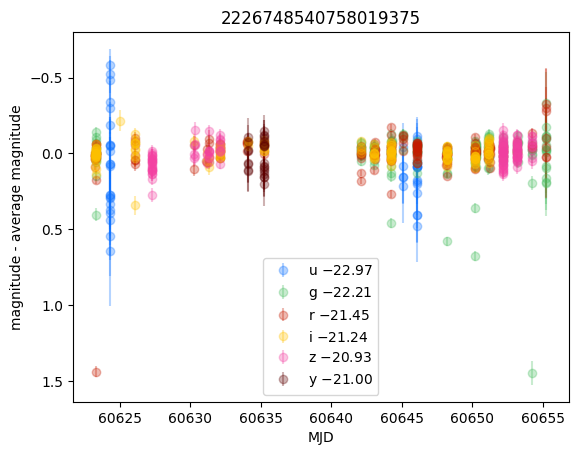

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargleMultiband

COLORS = {'u': '#0c71ff', 'g': '#49be61', 'r': '#c61c00',
          'i': '#ffc200', 'z': '#f341a2', 'y': '#5d0000'}

def extract_period_multiband_astropy(band, t, y, yerr, plot=True):
    freq, power = LombScargleMultiband(t, y, band, yerr).autopower(samples_per_peak=1000, nyquist_factor=1)
    idx_period = np.argmax(power)
    period = 1 / freq[idx_period]
    
    if plot:
        plt.plot(freq, power)
        plt.vlines(1/period, 0, power.max(), lw=2, ls='--', color='red')
    
    return period

lc = data.lc.query('psfFlux / psfFluxErr > 3 and ~psfFlux_flag')

mag = -2.5 * np.log10(lc['psfFlux']) + 31.4
magerr = 2.5 / np.log(10) * lc['psfFluxErr'] / lc['psfFlux']

plt.figure()
for b in 'ugrizy':
    i = lc['band'] == b
    if not np.any(i):
        continue
    mean_mag = np.average(mag[i], weights=1/magerr[i]**2)
    plt.errorbar(lc['midpointMJDTai'][i], mag[i] - mean_mag, magerr[i], fmt="o", alpha=0.3, color=COLORS[b], label=f'{b} $-${mean_mag:.2f}')
plt.gca().invert_yaxis()
plt.title(f'{OID}')
# plt.xlim(60640.19, 60640.20)
plt.xlabel('MJD')
plt.ylabel('magnitude - average magnitude')
plt.legend()

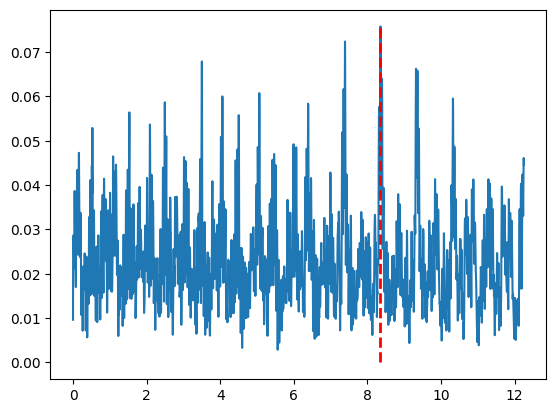

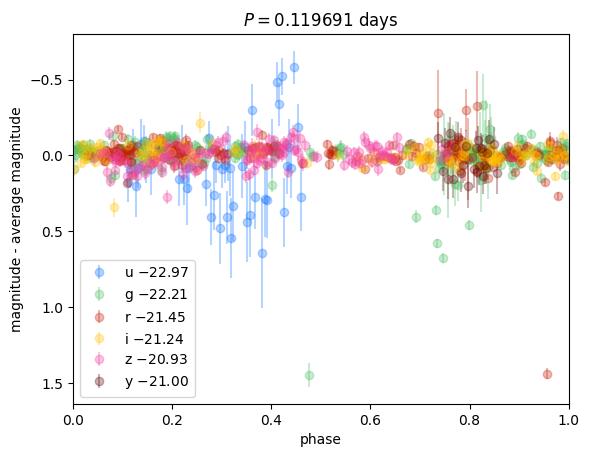

In [7]:
period = extract_period_multiband_astropy(lc['band'], lc['midpointMJDTai'], mag, magerr)
# period = extract_period_multiband_astropy(lc['band'], lc['midpointMJDTai'], lc['psfFlux'], lc['psfFluxErr'])

phase = lc['midpointMJDTai'] % period / period

plt.figure()
for b in 'ugrizy':
    i = lc['band'] == b
    mean_mag = np.average(mag[i], weights=1/magerr[i]**2)
    plt.errorbar(phase[i], mag[i] - mean_mag, magerr[i], fmt="o", alpha=0.3, color=COLORS[b], label=f'{b} $-${mean_mag:.2f}')
plt.gca().invert_yaxis()
plt.title(f'$P = {period:.6f}$ days')
plt.xlim(0, 1)
plt.xlabel('phase')
plt.ylabel('magnitude - average magnitude')
plt.legend()